# 이상값 탐색 및 처리 실습

## 1. 필요 라이브러리 import

In [6]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font = font_family, rc = {'axes.unicode_minus' : False})

## 2. Z검정(Z-Test)을 이용한 이상값 처리

In [9]:
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [10]:
data[0:2]

[86, 5]

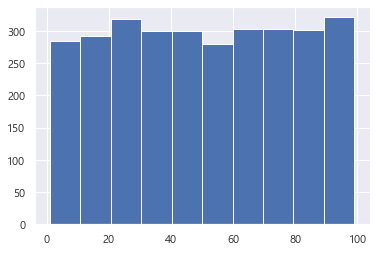

In [11]:
plt.hist(data)
plt.show()

50.507666666666665
28.45542610040404


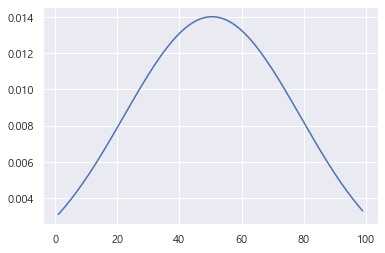

In [12]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

4.144832625267251e-17
1.0


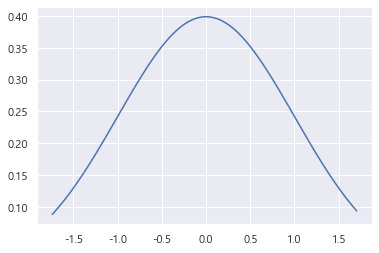

In [15]:
std_list = []

for i in data:
    z = (i - data_mean) / data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),
                       ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

In [16]:
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no] * 2)

50.596345514950166
28.5258439668339


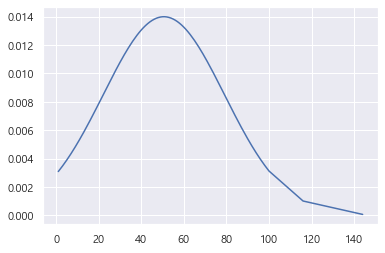

In [17]:
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),
                       ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

1.8884856764388046e-17
1.0


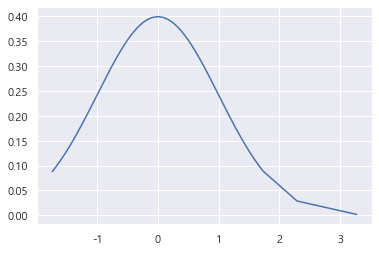

In [18]:
ol_std_list = []

for i in ol_data:
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),
                           ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [20]:
len(ol_std_list)

3010

In [21]:
for i in ol_std_list:
    z = i
    if z > 2:
        ol_std_list.remove(z)
    if z < -2:
        ol_std_list.remove(z)

In [22]:
len(ol_std_list)

3008

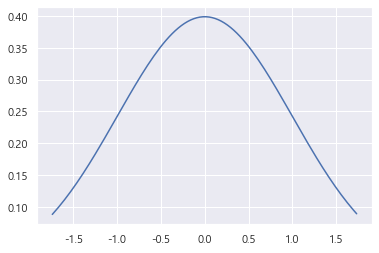

In [23]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

## 3. 사분위수 범위로 이상값 삭제

In [24]:
boxdata = pd.DataFrame(np.random.randn(100,3), columns=['A열','B열','C열'])

In [25]:
boxdata.head()

,A열,B열,C열
0,-0.829309,-1.128785,0.240096
1,1.611172,-0.359236,-0.003683
2,-2.710622,-0.812458,-0.894844
3,0.565828,0.601908,0.384869
4,-0.911472,0.951404,-0.052712


In [26]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.030516,0.062628,0.049446
std,0.941985,0.947631,1.042048
min,-2.710622,-2.128068,-2.489316
25%,-0.644794,-0.570603,-0.722758
50%,0.037979,0.084831,-0.085383
75%,0.559452,0.661175,0.766925
max,1.986483,2.638390,3.290201


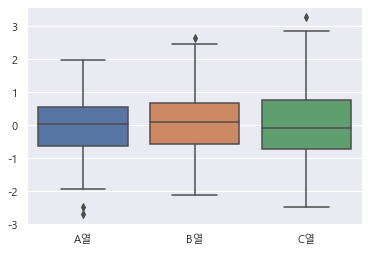

In [27]:
sns.boxplot(data = boxdata)
plt.show()

In [28]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
    return outlier_idx

In [29]:
outlier_idx = get_outlier(df=boxdata, column = 'B열', weight=1.5)

In [30]:
outlier_idx

Int64Index([62], dtype='int64')

In [31]:
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [32]:
boxdata.shape

(99, 3)

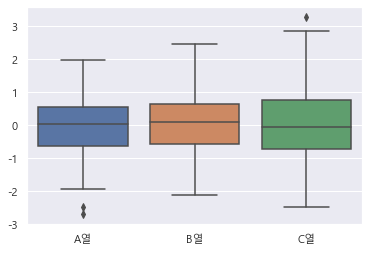

In [33]:
sns.boxplot(data = boxdata)
plt.show()

In [38]:
outlier_idx = get_outlier(df = boxdata, column = 'A열', weight=1.5)
outlier_idx

Int64Index([], dtype='int64')

In [39]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

(97, 3)

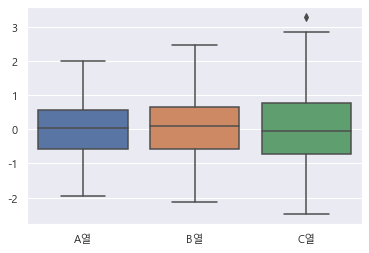

In [40]:
sns.boxplot(data = boxdata)
plt.show()

In [41]:
boxdata.shape

(97, 3)